In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests as rq
from config import weather_api_key

#Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [3]:
from citipy import citipy

In [4]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combo.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

589

In [5]:
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create the counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(3)
        
    #Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve the data.
        city_weather = rq.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d  %H-%M-%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
# If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate the Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | dikson
Processing Record 3 of Set 1 | ribeira grande
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | halifax
Processing Record 6 of Set 1 | zorritos
Processing Record 7 of Set 1 | new norfolk
Processing Record 8 of Set 1 | georgetown
Processing Record 9 of Set 1 | nova olinda do norte
Processing Record 10 of Set 1 | saskylakh
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | butaritari
Processing Record 16 of Set 1 | port blair
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | sofiysk
City not found. Skipping...
Processing Record 19 of Set 1 | hasaki
Processing Record 20 of Set 1 | port alfred
Processing Record 21 of Set 1 | merauke
Proc

Processing Record 39 of Set 4 | talnakh
Processing Record 40 of Set 4 | souillac
Processing Record 41 of Set 4 | kawana waters
City not found. Skipping...
Processing Record 42 of Set 4 | hermiston
Processing Record 43 of Set 4 | ulaanbaatar
Processing Record 44 of Set 4 | elko
Processing Record 45 of Set 4 | te anau
Processing Record 46 of Set 4 | moindou
Processing Record 47 of Set 4 | horconcitos
Processing Record 48 of Set 4 | gravdal
Processing Record 49 of Set 4 | beisfjord
Processing Record 50 of Set 4 | hihifo
City not found. Skipping...
Processing Record 1 of Set 5 | rocha
Processing Record 2 of Set 5 | haines junction
Processing Record 3 of Set 5 | saldanha
Processing Record 4 of Set 5 | rota
Processing Record 5 of Set 5 | ponta do sol
Processing Record 6 of Set 5 | walvis bay
Processing Record 7 of Set 5 | tocantinopolis
City not found. Skipping...
Processing Record 8 of Set 5 | camapua
Processing Record 9 of Set 5 | mount gambier
Processing Record 10 of Set 5 | ajaccio
Proce

Processing Record 26 of Set 8 | axim
Processing Record 27 of Set 8 | boende
Processing Record 28 of Set 8 | tonekabon
Processing Record 29 of Set 8 | dingle
Processing Record 30 of Set 8 | utiroa
City not found. Skipping...
Processing Record 31 of Set 8 | ustikolina
Processing Record 32 of Set 8 | mizan teferi
Processing Record 33 of Set 8 | saint george
Processing Record 34 of Set 8 | goderich
Processing Record 35 of Set 8 | kazanskoye
Processing Record 36 of Set 8 | manado
Processing Record 37 of Set 8 | esperance
Processing Record 38 of Set 8 | pedernales
Processing Record 39 of Set 8 | kazalinsk
City not found. Skipping...
Processing Record 40 of Set 8 | upington
Processing Record 41 of Set 8 | muroto
Processing Record 42 of Set 8 | centralia
Processing Record 43 of Set 8 | yining
Processing Record 44 of Set 8 | palestina
Processing Record 45 of Set 8 | parczew
Processing Record 46 of Set 8 | asau
Processing Record 47 of Set 8 | udachnyy
Processing Record 48 of Set 8 | tongchuan
Pr

Processing Record 15 of Set 12 | san luis
Processing Record 16 of Set 12 | kununurra
Processing Record 17 of Set 12 | lima
Processing Record 18 of Set 12 | caravelas
Processing Record 19 of Set 12 | hutchinson
Processing Record 20 of Set 12 | tiruvottiyur
City not found. Skipping...
Processing Record 21 of Set 12 | ugoofaaru
Processing Record 22 of Set 12 | perevolotskiy
Processing Record 23 of Set 12 | okhotsk
Processing Record 24 of Set 12 | port hedland
Processing Record 25 of Set 12 | lewistown
Processing Record 26 of Set 12 | barmer
Processing Record 27 of Set 12 | hamilton
Processing Record 28 of Set 12 | talaya
Processing Record 29 of Set 12 | turukhansk
Processing Record 30 of Set 12 | kasempa
Processing Record 31 of Set 12 | ilhabela
Processing Record 32 of Set 12 | tacna
Processing Record 33 of Set 12 | balaipungut
Processing Record 34 of Set 12 | zarand
Processing Record 35 of Set 12 | thoen
Processing Record 36 of Set 12 | zhigansk
Processing Record 37 of Set 12 | sungairay

In [7]:
len(city_data)

544

In [42]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[city_data_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2022-09-08 01-14-37,42.6001,-73.9662,64.35,92,48,2.39
1,Dikson,RU,2022-09-08 01-12-12,73.5069,80.5464,37.31,88,100,20.69
2,Ribeira Grande,PT,2022-09-08 01-14-48,38.5167,-28.7000,75.36,90,100,19.35
3,Jamestown,US,2022-09-08 01-14-47,42.0970,-79.2353,65.17,72,100,5.75
4,Halifax,CA,2022-09-08 01-14-48,44.6453,-63.5724,62.60,89,0,1.14
5,Zorritos,PE,2022-09-08 01-14-48,-3.6805,-80.6782,71.89,78,66,8.90
6,New Norfolk,AU,2022-09-08 01-14-49,-42.7826,147.0587,55.92,74,100,1.99
7,Georgetown,MY,2022-09-08 01-14-49,5.4112,100.3354,81.90,89,20,4.61
8,Nova Olinda Do Norte,BR,2022-09-08 01-14-49,-3.8881,-59.0942,83.93,51,96,2.33
9,Saskylakh,RU,2022-09-08 01-14-49,71.9167,114.0833,37.62,75,83,7.40


In [43]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [44]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

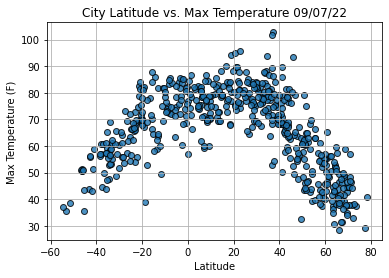

In [45]:
# Import time module (Done at top).

# Build the scatter plot for latittude vs. max temperature.
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

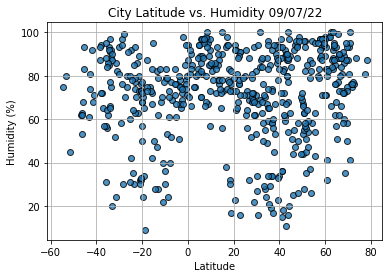

In [46]:
# Import time module (Done at top).

# Build the scatter plot for latittude vs. max temperature.
plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

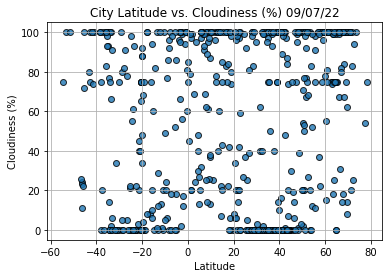

In [47]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

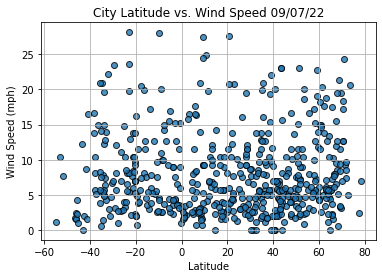

In [48]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [55]:
#Import linregress
from scipy.stats import linregress
    
# Create a function to perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()

In [56]:
index13 = city_data_df.loc[13]
index13

City                    Butaritari
Country                         KI
Date          2022-09-08  01-14-50
Lat                         3.0707
Lng                       172.7902
Max Temp                     81.36
Humidity                        75
Cloudiness                      24
Wind Speed                   16.44
Name: 13, dtype: object

In [57]:
# locate data in DataFrame for Northern Hemisphere
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2022-09-08 01-14-37,42.6001,-73.9662,64.35,92,48,2.39
1,Dikson,RU,2022-09-08 01-12-12,73.5069,80.5464,37.31,88,100,20.69
2,Ribeira Grande,PT,2022-09-08 01-14-48,38.5167,-28.7000,75.36,90,100,19.35
3,Jamestown,US,2022-09-08 01-14-47,42.0970,-79.2353,65.17,72,100,5.75
4,Halifax,CA,2022-09-08 01-14-48,44.6453,-63.5724,62.60,89,0,1.14


In [58]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

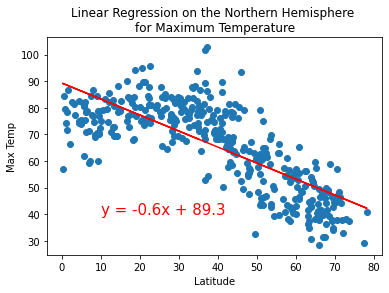

In [66]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       "Linear Regression on the Northern Hemisphere \nfor Maximum Temperature", 
                       "Max Temp",(10,40))


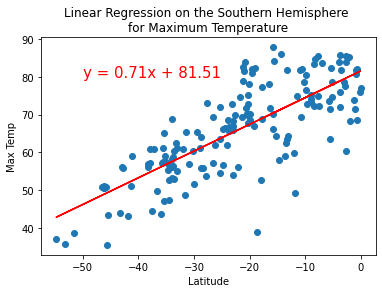

In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       "Linear Regression on the Southern Hemisphere \nfor Maximum Temperature", 
                       "Max Temp",(-50,80))


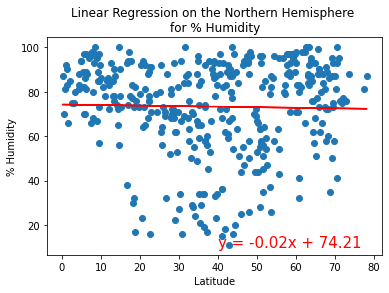

In [70]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity',
                       '% Humidity',(40,10))

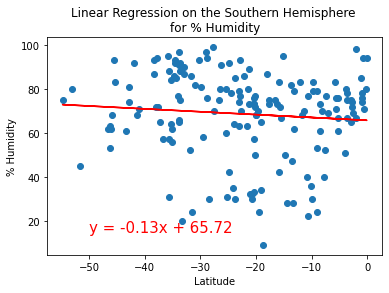

In [71]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity',
                       '% Humidity',(-50,15))

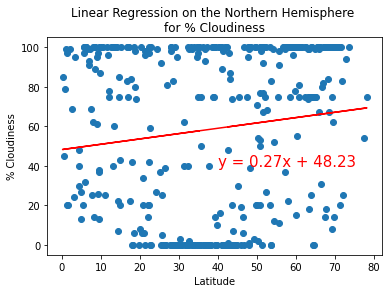

In [73]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness',
                       '% Cloudiness',(40,40))

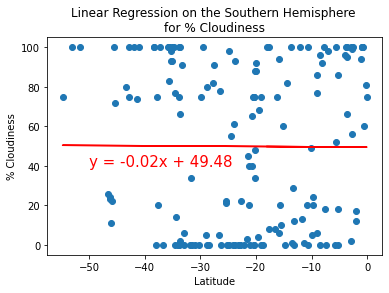

In [75]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness',
                       '% Cloudiness',(-50,40))

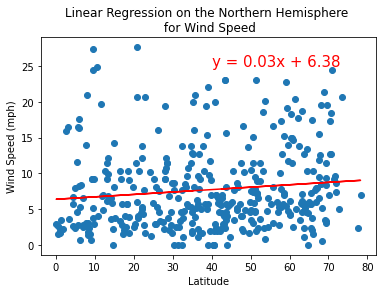

In [79]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed',
                       'Wind Speed (mph)',(40,25))

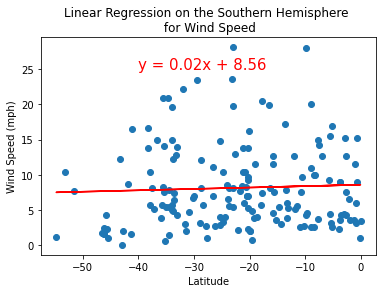

In [81]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed',
                       'Wind Speed (mph)',(-40,25))